In [8]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
data = fetch_california_housing()

In [10]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [11]:
X = data.data
y_columns = data.feature_names

In [12]:
independent_variables = pd.DataFrame(X, columns=y_columns)
dependent_variables = pd.Series(data.target)

In [13]:
print(dependent_variables.head())

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


In [14]:
independent_variables.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [15]:
import seaborn as sns

<Axes: >

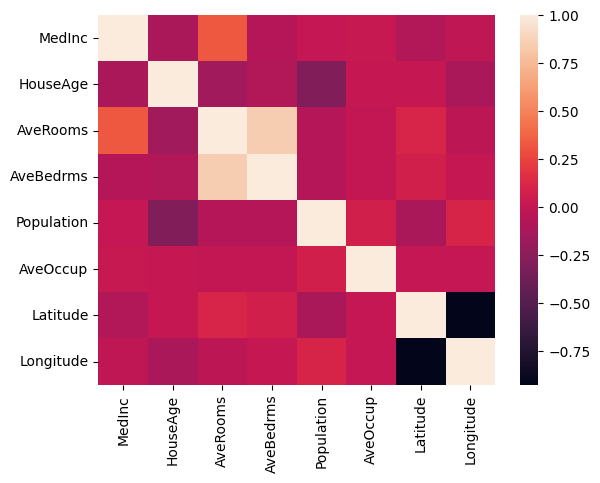

In [16]:
sns.heatmap(independent_variables.corr())

In [17]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variables, shuffle=True, random_state=42)

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
prediction = model.predict(X_test)

In [49]:
import matplotlib.pyplot as plt

In [50]:
model_2 = LinearRegression()
model_2.fit(X_train[["MedInc", "AveRooms"]], y_train)


LinearRegression()

c:\Users\dipak\.conda\envs\env2\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


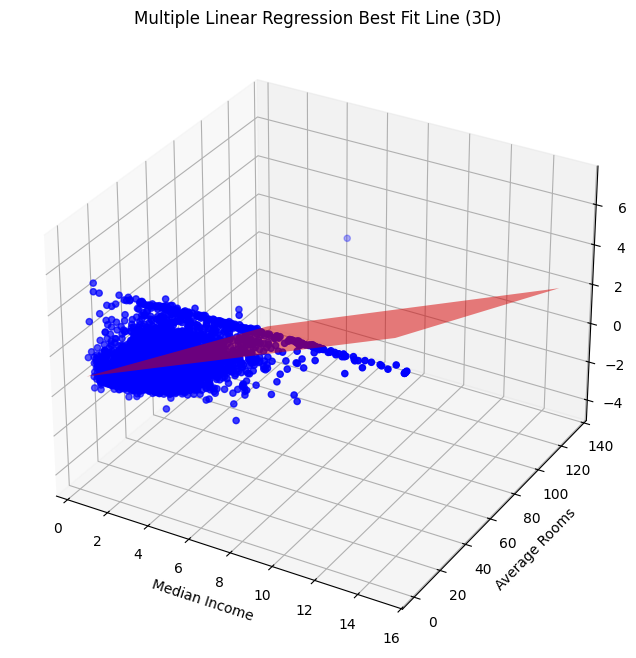

In [52]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test["MedInc"], X_test["AveRooms"],y_test, color="blue", label="Actual Data")
x1_range = np.linspace(X_test["MedInc"].min(), X_test["MedInc"].max(),100)
x2_range = np.linspace(X_test["AveRooms"].min(), X_test["AveRooms"].max(),100)
x1,x2 = np.meshgrid(x1_range, x2_range)
z = model_2.predict(np.c_[x1.ravel(),x2.ravel()])
z = z.reshape(x1.shape)
ax.plot_surface(x1,x2,z, color="red", alpha=0.5, rstride=100, cstride=100)
ax.set_xlabel("Median Income")
ax.set_ylabel("Average Rooms")
ax.set_zlabel("House Price")
ax.set_title("Multiple Linear Regression Best Fit Line (3D)")
plt.show()